In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# A. 데이터 전처리 - 데이터 읽어오기

In [14]:
import csv
import numpy as np
import pandas as pd

def file_open_by_numpy():
    np_arr = np.loadtxt('C:/Users/SSAFY/Desktop/02_pjt/finace/NFLX.csv', delimiter=",", encoding='cp949', dtype=str)
    return np_arr

arr = file_open_by_numpy()

columns=arr[0]
arr = np.delete(arr, 0, 0)
df = pd.DataFrame(arr, columns=columns)

df.loc[:, 'Date':'Close']

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


# B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

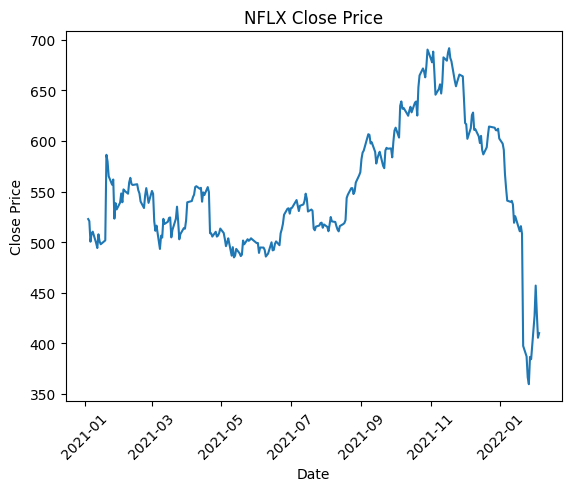

In [32]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/SSAFY/Desktop/02_pjt/finace/NFLX.csv', encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])

filtered_df = df[df['Date'].dt.year >= 2021]

plt.plot(filtered_df['Date'], filtered_df['Close'])
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.xticks(rotation=45)
plt.show()

# C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [33]:
import csv
import pandas as pd

df = pd.read_csv('C:/Users/SSAFY/Desktop/02_pjt/finace/NFLX.csv', encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])

filtered_df = df[df['Date'].dt.year >= 2021]

max_price = filtered_df['Close'].max()
print("최고 종가:", max_price)

min_price = filtered_df['Close'].min()
print("최저 종가:", min_price)


최고 종가: 691.690002
최저 종가: 359.700012


# D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

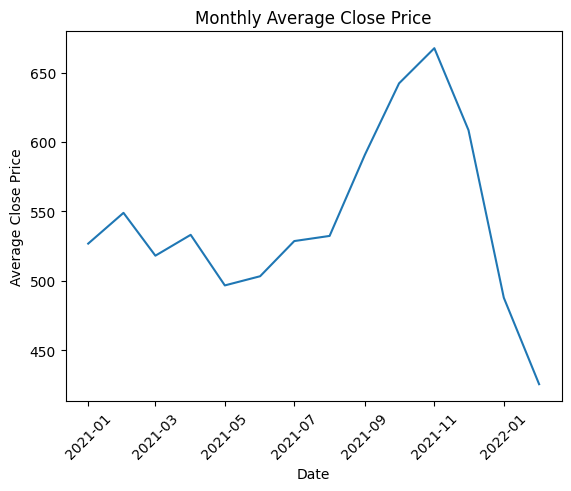

In [36]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/SSAFY/Desktop/02_pjt/finace/NFLX.csv', encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])

filtered_df = df[df['Date'].dt.year >= 2021]
monthly_avg_close = filtered_df.groupby(filtered_df['Date'].dt.to_period("M")).mean()['Close']

result_df = pd.DataFrame({'Date': monthly_avg_close.index.to_timestamp(), 'Close': monthly_avg_close.values})

plt.plot(result_df['Date'], result_df['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')

plt.xticks(rotation=45)
plt.show()

# E. 데이터 시각화 - 2022년 이후 최고, 최저 종가 시각화하기

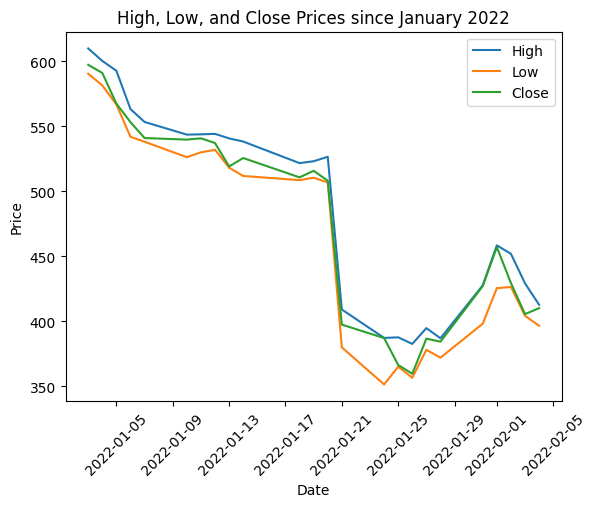

In [43]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/SSAFY/Desktop/02_pjt/finace/NFLX.csv', encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])

filtered_df = df[df['Date'].dt.year >= 2022]

plt.plot(filtered_df['Date'], filtered_df['High'],  label='High')
plt.plot(filtered_df['Date'], filtered_df['Low'],  label='Low')
plt.plot(filtered_df['Date'], filtered_df['Close'], label='Close')

plt.legend()

plt.title('High, Low, and Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=45)
plt.show()